In [1]:
import pandas as pd
import numpy as np

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import pipeline

In [2]:
df = pd.read_csv('phone_price_classification.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
X  = df.drop('price_range', axis = 1).values
y  = df['price_range'].values

# Bayesian optimization

In [4]:
def optimize(parameters, parameters_names, x, y, list_of_all_parameters):
    print(parameters, parameters_names)
    list_of_all_parameters.append(parameters)
    parameters = dict(zip(parameters_names, parameters)) 
    model  = ensemble.RandomForestClassifier(**parameters) 
    kf     = model_selection.StratifiedKFold(n_splits = 5)

    accuracies = []
    for id in kf.split(X=x, y=y):
        train_id, test_id = id[0], id[1]

        xtrain = x[train_id]
        ytrain = y[train_id]
        xtest = x[test_id]
        ytest = y[test_id]

        model.fit(xtrain, ytrain)
        predict = model.predict(xtest)
        fold_acc = metrics.accuracy_score(ytest, predict)

        accuracies.append(fold_acc)

    return -1*np.mean(accuracies)

In [5]:
from functools import partial
from skopt import space
from skopt import gp_minimize

In [6]:
parameters_space = [
    space.Integer(3, 20, name="max_depth"),
    space.Integer(200, 600, name="n_estimators"),
    space.Categorical(["entropy", "gini"], name="criterion"), #In case of regression tasks use MSE or MAE for criterion
    space.Real(0.01, 1, prior = "uniform", name="max_features")
]

In [7]:
parameters_names  = ["max_depth", "n_estimators", "criterion", "max_features" ]
parameters_names

['max_depth', 'n_estimators', 'criterion', 'max_features']

In [8]:
list_of_all_parameters = []
optimization_func = partial(optimize, parameters_names = parameters_names, x = X, y = y, list_of_all_parameters = list_of_all_parameters)

In [9]:
result = gp_minimize(optimization_func, dimensions = parameters_space, n_calls = 12, n_random_starts = 10, verbose = 10)

Iteration No: 1 started. Evaluating function at random point.
[8, 584, 'gini', 0.030415462487492835] ['max_depth', 'n_estimators', 'criterion', 'max_features']
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.5126
Function value obtained: -0.7780
Current minimum: -0.7780
Iteration No: 2 started. Evaluating function at random point.
[15, 427, 'gini', 0.1525781343834144] ['max_depth', 'n_estimators', 'criterion', 'max_features']
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 5.3219
Function value obtained: -0.8700
Current minimum: -0.8700
Iteration No: 3 started. Evaluating function at random point.
[4, 365, 'gini', 0.1536334514732058] ['max_depth', 'n_estimators', 'criterion', 'max_features']
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.5026
Function value obtained: -0.8140
Current minimum: -0.8700
Iteration No: 4 started. Evaluating function at random point.
[20, 395, 'entropy', 0.8643821005257634] ['max_depth', 'n_esti

In [10]:
print(list_of_all_parameters)
print(len(list_of_all_parameters))

[[8, 584, 'gini', 0.030415462487492835], [15, 427, 'gini', 0.1525781343834144], [4, 365, 'gini', 0.1536334514732058], [20, 395, 'entropy', 0.8643821005257634], [5, 499, 'entropy', 0.9665819179726965], [9, 329, 'gini', 0.5093007319774084], [19, 275, 'entropy', 0.8584681038110599], [16, 503, 'gini', 0.4171328141512621], [10, 513, 'entropy', 0.5611646845802827], [14, 407, 'entropy', 0.09545285053795477], [20, 411, 'gini', 0.6799490718931591], [20, 532, 'gini', 1.0]]
12


In [11]:
print(result)

          fun: -0.9099999999999999
            x: [20, 395, 'entropy', 0.8643821005257634]
    func_vals: [-7.780e-01 -8.700e-01 -8.140e-01 -9.100e-01 -8.785e-01
                -9.005e-01 -9.050e-01 -9.000e-01 -9.060e-01 -7.660e-01
                -9.015e-01 -8.950e-01]
      x_iters: [[8, 584, 'gini', 0.030415462487492835], [15, 427, 'gini', 0.1525781343834144], [4, 365, 'gini', 0.1536334514732058], [20, 395, 'entropy', 0.8643821005257634], [5, 499, 'entropy', 0.9665819179726965], [9, 329, 'gini', 0.5093007319774084], [19, 275, 'entropy', 0.8584681038110599], [16, 503, 'gini', 0.4171328141512621], [10, 513, 'entropy', 0.5611646845802827], [14, 407, 'entropy', 0.09545285053795477], [20, 411, 'gini', 0.6799490718931591], [20, 532, 'gini', 1.0]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                                        n_restarts_optimizer=2, noise='gaussian',
                                    

In [12]:
print(dict(zip(parameters_names, result.x)))

{'max_depth': 20, 'n_estimators': 395, 'criterion': 'entropy', 'max_features': 0.8643821005257634}


In [13]:
best_parameters = result.x
print(best_parameters)
print(float(best_parameters[3]))

[20, 395, 'entropy', 0.8643821005257634]
0.8643821005257634


In [14]:
classifier = ensemble.RandomForestClassifier(criterion =best_parameters[2], max_depth = int(best_parameters[0]), n_estimators = int(best_parameters[0]),
                                             max_features = float(best_parameters[3]), n_jobs=-1)


In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y, cv=10)
print('scores\n',score)
print('\ncv values', score.shape)
print('\nScore_Mean', score.mean())

scores
 [0.9   0.89  0.92  0.91  0.91  0.91  0.885 0.875 0.885 0.875]

cv values (10,)

Score_Mean 0.8960000000000001


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [18]:
scaling_x = [i for i in range(1, 16, 1)]
print(scaling_x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


ValueError: x and y must have same first dimension, but have shapes (15,) and (12,)

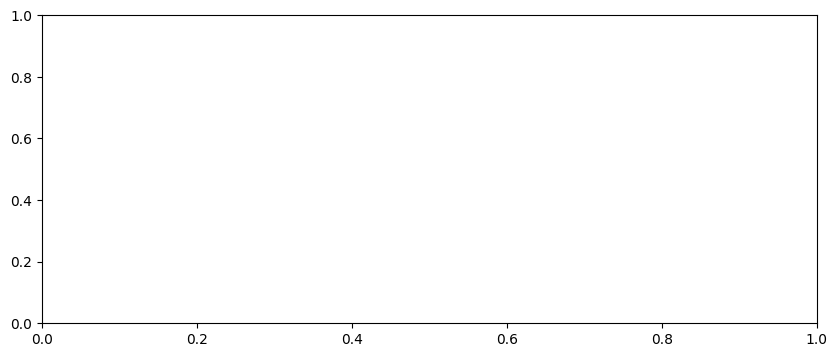

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_scores = []
val_scores = []
for param in list_of_all_parameters:
    # Initialize classifier with current n_estimators
    classifier = RandomForestClassifier(criterion =param[2], max_depth = int(param[0]), n_estimators = int(param[0]),
                                             max_features = float(param[3]), n_jobs=-1, random_state=42)

    # Train the classifier
    classifier.fit(x_train, y_train)

    # Predict probabilities for ROC AUC calculation
    y_train_score = classifier.predict_proba(x_train)
    y_val_score = classifier.predict_proba(x_test)

    # Compute ROC AUC scores
    train_roc_auc = roc_auc_score(y_train, y_train_score, multi_class='ovr')
    val_roc_auc = roc_auc_score(y_test, y_val_score, multi_class='ovr')

    # Store scores
    train_scores.append(train_roc_auc)
    val_scores.append(val_roc_auc)
    roc_score_BO = val_scores
# Plotting the learning curves
plt.figure(figsize=(10, 4))
plt.plot(scaling_x, train_scores, marker='+', label='Training ROC AUC')
plt.plot(scaling_x, val_scores, marker='+', label='Validation ROC AUC')
plt.xlabel('No. of Estimators')
plt.ylabel('ROC AUC Score')
plt.title('No. of Estimators vs ROC AUC Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score

# Example data (replace with your actual data)
classifier.fit(x_train, y_train)

y_score =  classifier.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

# Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model_RFC = RandomForestClassifier(n_estimators=10,random_state=42)
model_RFC.fit(x_train,y_train)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score

# Example data (replace with your actual data)

y_score = model_RFC.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)


In [ ]:
# Initialize the Random Forest classifier


# Perform 10-fold cross-validation
score = cross_val_score(model_RFC, X, y, cv=10)

# Print the scores
print('scores\n', score)

# Print the shape of the scores array
print('\ncv values', score.shape)

# Print the mean score
print('\nScore_Mean', score.mean())

# hyper opt

In [ ]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

In [ ]:
# Optimization is finding the input value or set of values to an objective function that yields the lowest output value, called a “loss”.
def optimize(params, x, y, list_of_all_params_hyperopt):
    list_of_all_params_hyperopt.append(list(params.values()));
    model = ensemble.RandomForestClassifier(**params)
    kf = model_selection.KFold(n_splits=5)
    accuracies = []
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]

        xtest = x[test_idx]
        ytest = y[test_idx]

        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        fold_acc = metrics.accuracy_score(ytest, preds)
        accuracies.append(fold_acc)

    return -1.0 * np.mean(accuracies)

In [ ]:
'''There is also a few quantized versions of those functions, which rounds the generated values at each step of “q”:
    ∙ hp.quniform(label, low, high, q)
    ∙ hp.qloguniform(label, low, high, q) '''

param_space = {
    "max_depth": scope.int(hp.quniform("max_depth", 3, 15, 1)),
    "n_estimators": scope.int(hp.quniform("n_estimators", 100, 600, 1)),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "max_features": hp.uniform("max_features", 0.01, 1)
}

list_of_all_params_hyperopt=[]
optimization_function = partial(
    optimize,
    x=X,
    y=y,
    list_of_all_params_hyperopt=list_of_all_params_hyperopt
)

trials = Trials() # It would be nice to see exactly what is happening inside the hyperopt black box. The Trials object allows us to do just that.

result = fmin(
    fn=optimization_function,
    space=param_space,
    algo=tpe.suggest,
    max_evals=15,
    trials=trials,
)

print(result)

In [ ]:
print(list_of_all_params_hyperopt)

In [ ]:
# Print the result  hyperparameters
print("result  hyperparameters:", result)

In [ ]:
# Train the model with the result  hyperparameters
best_parameters = {
    'max_depth': int(result['max_depth']),
    'n_estimators': int(result['n_estimators']),
    'criterion': ['gini', 'entropy'][result['criterion']],
    'max_features': result['max_features']
}


In [ ]:
# Train the model with the best hyperparameters
best_clf = RandomForestClassifier(**best_parameters)
cross_val_scores = cross_val_score(best_clf, X, y, scoring='accuracy', cv=5)

In [ ]:
# Example data (replace with your actual data)
best_clf.fit(x_train, y_train)

y_score =  best_clf.predict_proba(x_test)  # Predicted probabilities for all classes
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

In [ ]:

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_scores = []
val_scores = []
for para in list_of_all_params_hyperopt:
    # Initialize classifier with current n_estimators
    classifier = RandomForestClassifier(criterion =para[0], max_depth = int(para[1]), n_estimators = int(para[3]),
                                             max_features = float(para[2]), n_jobs=-1, random_state=42)

    # Train the classifier
    classifier.fit(x_train, y_train)

    # Predict probabilities for ROC AUC calculation
    y_train_score = classifier.predict_proba(x_train)
    y_val_score = classifier.predict_proba(x_test)

    # Compute ROC AUC scores
    train_roc_auc = roc_auc_score(y_train, y_train_score, multi_class='ovr')
    val_roc_auc = roc_auc_score(y_test, y_val_score, multi_class='ovr')

    # Store scores
    train_scores.append(train_roc_auc)
    val_scores.append(val_roc_auc)
    roc_score_hyperopt = val_scores
# Plotting the learning curves
plt.figure(figsize=(10, 4))
plt.plot(scaling_x, train_scores, marker='+', label='Training ROC AUC')
plt.plot(scaling_x, val_scores, marker='+', label='Validation ROC AUC')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.title('Number of Estimators vs ROC AUC Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(scaling_x, roc_score_hyperopt, marker='+', label='ROC AUC Hyperopt')
plt.plot(scaling_x, roc_score_BO, marker='+', label='ROC AUC BO')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.title('Number of Estimators vs ROC AUC Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()